# Welcome to Machine Learning -- An Interdisciplinary Introduction

In our hands-on sessions, we will introduce and utilize several machine learning techniques.
 



## Introduction

### Simple Data Structures
This first JuPyter notebook explains the basics of machine learning, which is a Multi-Dimensional Array structure.
Many of you are surely familiar with scalar value. 
These are just single numbers that have a specific value.

### Array Operations
All mathematical operations can be applied to matrices, and we can use the default python operators `+, -, *, /, //, %, **`.
You can also modify matrices inplace using `+=, -=, /=, //=, %=, **=`.
By default, all operations are just done element-wise.
This is only possible when the dimensionality of the operands are identical:

In [2]:
scalar = 0.5

This morning you have learned about other data structures.
One of these structures was a list, which can contain various different python objects.

In [3]:
import math
values = [0, 1., 1e-4, True, "Wednesday", None, math]

In machine learning, we typically rely on numerical data only; how other types of data are handled will be discussed later this week.
Any list of numerical values can be represented as a mathematical vector:

In [4]:
vector = [0.,1.,2.,3.,4.]

Now, since a list can contain any type of objects, lists can also contain lists, in which case we talk about nested lists.

In [5]:
nested = [
  [0.,1.,2.,3.,4.],
  [6.,7.,8.,9.],
  [11.,12.,13.]
]

When all of the nested lists have the same number of element (the same dimensionality), they build the mathematical concept of a matrix.

In [6]:
matrix = [
  [0.,1.,2.,3.,4.],
  [6.,7.,8.,9.,10.],
  [11.,12.,13.,14.,15.]
]

In the above example, the matrix has three rows and 5 columns.
Similarly, we can extend this idea to build a tensor, which is basically adding another layer of nesting.

In [7]:
tensor = [
  [[0.,1.], [2.,3.], [4.,5.], [6.,7.]],
  [[8.,9.], [10.,11.], [12.,13.], [14.,15.]],
  [[16.,17.], [18.,19.], [20.,21.], [22.,23.]]
]

The above tensor has the dimensionality of $3\times4\times2$.
Factually, also the scalars, vectors and matrices are specializations of tensors with zero, one or two levels.
Also, tensors are not limited to three levels, but larger structures are also possible -- for example, deep learning systems usually use four level tensors.

## Task 1 (2 minutes)

Obtain the dimensionality of the above data structures.
The length of a list can be obtained using the `len` function in python.
To index an element in python, you can use the index operators, e.g., `values[1]`.
For the vector, the matrix and the tensor, obtain the dimensionality of these data structures.

In [8]:
# print the length of the vector
print(len(vector))
# print the dimensionality of the matrix
print(len(matrix), len(matrix[0]))
# print the dimensionality of the tensor
print(len(tensor), len(tensor[0]), len(tensor[0][0]))

5
3 5
3 4 2



### Numpy Arrays
While it is possible to work with these types of nested lists, it is often easier and faster to work with a dedicated data structure for numerical data.
Such a data structure is provided in the `torch` python library.
The basic data structure represents any multidimensional mathematical tensor, therefore the data structure is called `torch.tensor`.
A `torch.tensor` is a Python class and can be constructed in various different ways.

The easiest way of defining `torch.tensor`s is to construct them from data:

In [9]:
import torch
my_array = torch.tensor([
  [-1., 2., 3],
  [3., -4., 1e-4]
])

We can print the contents of the array using pythons built-in `print` function.
We can also obtain the dimensionality of the array by asking for its `shape`:

In [10]:
print(my_array)
print(my_array.shape)

tensor([[-1.0000e+00,  2.0000e+00,  3.0000e+00],
        [ 3.0000e+00, -4.0000e+00,  1.0000e-04]])
torch.Size([2, 3])


## Task 2 (3 minutes)

Create `torch.tensor`s for all our data structures from above.
Print the shapes of all structures.
What happens to our nested list above?

In [1]:
import torch 
# turn all of our data structures into numpy arrays
scalar_array = torch.tensor(scalar)
vector_array = torch.tensor(vector)
matrix_array = torch.tensor(matrix)
tensor_array = torch.tensor(tensor)

# print their shape
print(scalar_array.shape)
print(vector_array.shape)
print(matrix_array.shape)
print(tensor_array.shape)

# what about nested arrays of different lengths?
nested_array = torch.tensor(nested)
print(nested_array.shape)


NameError: name 'scalar' is not defined

Another way of defining `torch.tensor`s is by defining their `shape`.
The function to create an empty array is the `numpy.ndarray` function (not to be confused with the `torch.tensor` class), or the `torch.empty` function.
A specific data type can be specified using the `dtype` argument, which can take various types, such as `float` (the default), `ìnt`, `bool`, `complex` and alike.
The data is usually **uninitialized** and contain anything that resides in that region of the RAM:

In [ ]:
empty_array = torch.empty((4,7), dtype=torch.float32)
print(empty_array)
int_array = torch.empty((2,3), dtype=torch.uint8)
print(int_array)
bool_array = torch.empty((2,3), dtype=torch.bool)
print(bool_array)

tensor([[1.1433e-17, 1.4013e-45, 6.3522e-29, 1.4013e-45, 4.2049e-29, 1.4013e-45,
         1.4013e-45],
        [0.0000e+00, 8.4078e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00]])
tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)
tensor([[ True, False, False],
        [False, False, False]])


In order to initialize the data, you can use various functions.
For examples, you can initialize with `0`, `1` or alike:

In [ ]:
zero_matrix = torch.zeros((3,4))
print(zero_matrix)

one_matrix = torch.ones((2,4,3), dtype=torch.int)
print(one_matrix)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=torch.int32)


Another option is to create random data using functionality from `torch`.
Random values between 0 and 1 are obtained using `torch.rand`.

In [ ]:
random_array = torch.rand((2,4))
print(random_array)

tensor([[0.9349, 0.7415, 0.5557, 0.5004],
        [0.8203, 0.0867, 0.5626, 0.3521]])


Normal distributed values can be obtained with `torch.normal` where one can specify the mean and the standard deviation of the values.
For example, if you want to have 6 two-dimensional normal distributed vectors with mean $(-3,1)$ and standard deviation of $(2,1)$, you can write:

In [ ]:
normal_array = torch.normal(mean = torch.tensor([(-3,1.)]*6), std = torch.tensor([(2.,1.)]*6))
print(normal_array)

tensor([[-3.7408,  2.0756],
        [-4.8404, -1.6297],
        [-1.8373,  0.1598],
        [-2.0926,  1.5099],
        [-2.3911,  1.6957],
        [-0.4435,  0.6035]])


More random distributions can be found in the `torch.distributions` package, for example:

In [ ]:
normal_array = torch.distributions.normal.Normal(loc=torch.tensor((-3.,1.)), scale=torch.tensor((2.,1.))).sample([6])
print(normal_array)

bernoulli_array = torch.distributions.bernoulli.Bernoulli(probs=0.5).sample([4,3])
print(bernoulli_array)

tensor([[-2.7228,  2.2897],
        [-6.3658,  1.6334],
        [-1.2010,  2.5581],
        [-4.8419,  2.1141],
        [-1.7476,  0.0422],
        [-1.4488,  1.1852]])
tensor([[1., 1., 1.],
        [0., 1., 1.],
        [0., 0., 0.],
        [0., 1., 0.]])


Arrays can also be combined using `torch` functionality.
For example, `torch.concat` will concatenate two arrays (where the all but the first level must be identically shaped), while `torch.stack` will produce a new dimension (all dimensions must be identically shaped):

In [ ]:
concatenated = torch.concat((torch.zeros((2,4)), torch.ones((3,4))))
print(concatenated, concatenated.shape)

stacked = torch.stack((torch.zeros((2,4)), torch.ones((2,4))))
print(stacked, stacked.shape)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) torch.Size([5, 4])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) torch.Size([2, 2, 4])


In [ ]:
negatives = torch.zeros((3,2)) - torch.ones((3,2))
print(negatives)

tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.]])


Mathematical operations can also be **broadcasted**, i.e., dimensionalities are automatically adapted.
The most simple broadcasting is via a scalar, but more complicated broadcasts can be done.

In [ ]:
random_range = torch.rand((4,2)) * 10. - 5.
print(random_range)

mixes = torch.ones((3,2)) * torch.tensor([-1,3])
print(mixes)

tensor([[ 1.9678, -0.7754],
        [ 3.6610, -1.5514],
        [-4.0785, -4.0966],
        [ 3.0049,  3.8306]])
tensor([[-1.,  3.],
        [-1.,  3.],
        [-1.,  3.]])


Comparison of matrices can be done using the default comparison operators `>, >=, <, <=, ==`.
These operations are applied element-wise and result in boolean arrays.
If you want to reduce these to a single value (to be used in an `if` condition), you can use the `all` or `any` functions.
Broadcasting applies for operators as well:

In [ ]:
random_positives = random_range > 0
print(random_positives)
print(random_positives.all())
print(random_positives.any())

tensor([[ True, False],
        [ True, False],
        [False, False],
        [ True,  True]])
tensor(False)
tensor(True)


Also, other mathematical operations are applied element-wise:

In [ ]:
x = torch.tensor([1.,2.,3.,4.,5.])
print(torch.exp(x))
print(torch.sin(x))
print(torch.log(x))

tensor([  2.7183,   7.3891,  20.0855,  54.5981, 148.4132])
tensor([ 0.8415,  0.9093,  0.1411, -0.7568, -0.9589])
tensor([0.0000, 0.6931, 1.0986, 1.3863, 1.6094])


### Indexing Arrays
Arrays can be indexed in several ways, typically using the index `[]` operator.
To obtain a certain value, you can specify the exact index.
Indexing starts at 0 and negative indexes work similarly as with python lists.
Other than for python lists, indexes can contain tuples:

In [ ]:
print(normal_array[3][1])
print(normal_array[3,1])

tensor(2.1141)
tensor(2.1141)


As you can see, when using the index operator, a scalar value is returned, which is defined as a `torch.tensor` with 1 value.
If you want to obtain the raw data, you can use the `.item()` function on the tensor; note that this only works for scalars, not for vectors, matrices or higher-order tensors.

In [ ]:
print(normal_array[3,1].item())

2.1140713691711426


You can also use boolean arrays for indexing.
Note that also integral arrays are allowed, but results might be different from what you expect.

In [ ]:
random_range[random_positives] *= -1
print(random_range)
print(torch.all(random_range <= 0))

tensor([[-1.9678, -0.7754],
        [-3.6610, -1.5514],
        [-4.0785, -4.0966],
        [-3.0049, -3.8306]])
tensor(True)


When indexing arrays with fewer entries than levels, sub-arrays are returned.
Indexing always starts at the first level, missing levels are assumed to be all elements:

In [ ]:
print(matrix_array[0])
print(matrix_array[1])
print(tensor_array[0])
print(tensor_array[0,2])

tensor([0., 1., 2., 3., 4.])
tensor([ 6.,  7.,  8.,  9., 10.])
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.]])
tensor([4., 5.])


You can also use `start:end` to define ranges, where `:` just represents all elements as this level. 
Similarly, you can define `start:end:step` to define slices.
This can be useful, when you actually want to index the second level only.
Note that negative `step`s are not allowed in PyTorch (in `numpy`, they are allowed).

In [ ]:
print(vector_array[1:3])
print(matrix_array[:,1])
print(tensor_array[-1,0:2:2,::2])

tensor([1., 2.])
tensor([ 1.,  7., 12.])
tensor([[16.]])


## Task 3 (5 minutes)
Generate a random array in dimension `(5,4)`, where the values are in range $[-2, 4]$.
Multiply all negative values with 4, divide all positive values by 4.
Print the array.
Compute the sum of all elements.

In [ ]:
torch.rand((5,4)) * 6 - 2

tensor([[ 2.6273, -0.1789,  0.7508,  0.0808],
        [ 3.2149,  0.8047,  3.7948,  0.5431],
        [ 2.8551,  1.8338,  1.2177,  0.8043],
        [ 2.0217,  2.9388,  3.3041,  1.4048],
        [ 1.7646,  3.7265,  1.7615,  0.6386]])

In [ ]:
torch.rand((5,4)) 

tensor([[0.1882, 0.1299, 0.5738, 0.0082],
        [0.7445, 0.8127, 0.1841, 0.8225],
        [0.9618, 0.8229, 0.0540, 0.3588],
        [0.9688, 0.5176, 0.6209, 0.7134],
        [0.8491, 0.9174, 0.6560, 0.2101]])

In [14]:
# generate random array
random_array = torch.rand((5,4)) * 6 - 2
# multiply negative values with 4
random_array[random_array<0] *= 4
# divide positive values by 4
random_array[random_array>0] /= 4
print(random_array, random_array.sum().item())

tensor([[ 0.0186,  0.6488, -6.8942,  0.5457],
        [-0.8561,  0.4997,  0.1724,  0.8359],
        [ 0.3521, -2.8437,  0.0665,  0.1432],
        [ 0.9909,  0.4588, -0.6936,  0.7931],
        [ 0.8081,  0.3213, -7.4993, -7.1650]]) -19.296728134155273


In [ ]:
random_array *= 4

In [21]:
random_array = random_array * 4

tensor([[   1.1924,   41.5216, -441.2318,   34.9271],
        [ -54.7910,   31.9810,   11.0335,   53.4998],
        [  22.5356, -181.9944,    4.2573,    9.1623],
        [  63.4206,   29.3617,  -44.3913,   50.7593],
        [  51.7211,   20.5612, -479.9571, -458.5592]])

In [16]:
random_array.sum().item()

-19.296728134155273

### Sorting Arrays
Several times, you will need to sort your arrays ascendingly.
Similarly to the `sorted` function in python, you can sort an array using `torch.sort`.
Note that this function returns two values: the sorted array, and the indexes that -- applied to the original unsorted list -- will provide the sorted list.

In [ ]:
unsorted = torch.tensor([-4, 3, 7, -5, 0, 6, 4])
sorted_array, sorted_indexes = torch.sort(unsorted)
print(sorted_array)
print(sorted_indexes)
print(unsorted[sorted_indexes])

tensor([-5, -4,  0,  3,  4,  6,  7])
tensor([3, 0, 4, 1, 6, 5, 2])
tensor([-5, -4,  0,  3,  4,  6,  7])


### Matrix Operations
As mentioned above, by default all array operations are performed element-wise.
Mathematical matrix operations can be applied using `torch` functionality.
For example, the dot product between two arrays (matrices, vectors) can be performed via `torch.matmul`.
Vector operations are, for example, `torch.inner`, `torch.outer`.
Matrices can be transposed using `torch.transpose` or quickly the `.T` member.

In [ ]:
vector = torch.rand((4))
matrix = torch.rand((3,4))
print(torch.matmul(matrix, vector))
print(torch.matmul(vector, matrix.T))

tensor([1.4740, 1.3518, 1.0964])
tensor([1.4740, 1.3518, 1.0964])


We can also reduce matrices by computing min, max, mean and standard deviation across a specific `dim`.
Please note that `torch.max` additionally returns the indexes across the given `dim` when a `dim` is specified.

In [ ]:
normal_array = torch.normal(torch.tensor([(-3,4.)]*1000), torch.tensor([(6.,7.)]*1000))
print(torch.min(normal_array))
print(torch.max(normal_array, dim=0))
print(torch.mean(normal_array, dim=0))
print(torch.std(normal_array, dim=0))

tensor(-20.9765)
torch.return_types.max(
values=tensor([16.1077, 28.0368]),
indices=tensor([782, 612]))
tensor([-3.0345,  4.2707])
tensor([5.9078, 6.9779])


We can also quickly compute norms of vectors and matrices, or invert matrices:

In [ ]:
import scipy.spatial
print(torch.norm(vector).item())
print(torch.inverse(torch.tensor([[2.,0.], [0.,-2.]])))


1.4634720087051392
tensor([[ 0.5000,  0.0000],
        [ 0.0000, -0.5000]])


 Since PyTorch is optimized for parallel processing, distance computations are not as straightforward.
 We first need to instantiate a distance object, and then we can compute distances: 

In [ ]:
euclidean = torch.nn.PairwiseDistance(p=2)
print(euclidean(vector, vector-2).item())
cosine = torch.nn.CosineSimilarity(dim=0)
print(cosine(vector, matrix[0]).item())

4.000001907348633
0.8293983340263367


### Plotting with matplotlib

Plotting is usually done with `matplotlib`, which typically handles `torch.tensor`s as expected.
Here, we describe only standard functionality, much more can be done otherwise.
All plots in the slides are generated with `matplotlib`.

### Line plotting
There are several ways of plotting a line in `matplotlib`.
A straight line can be defined by a start and an end point.
The `pyplot.plot` function will take all x-positions and y-positions in a list/array.
How the line is plotted is defined using a `format` option, which combines color `rgbkmcy` and style `.+*xosd-:`.
A blue line is plotted with format `b-`:

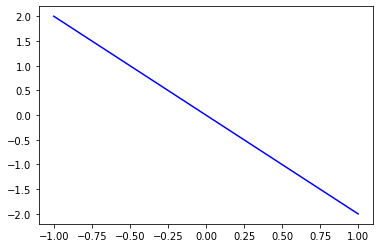

In [27]:
from matplotlib import pyplot
two_points = torch.tensor([
  (-1,1),
  (2,-2)
])
pyplot.plot(two_points[0], two_points[1], "b-")

Generally, `matplotlib` plots points connected with straight lines. 
To be more fine-grained, use more offset positions.

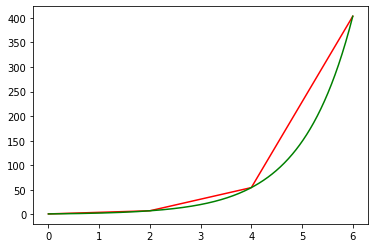

In [ ]:
x = torch.arange(0,6.001,2)
pyplot.plot(x,torch.exp(x), "r-")
x = torch.arange(0,6.001,0.01)
pyplot.plot(x,torch.exp(x), "g-")

You can also add labels, axis labels, and more.

Text(0, 0.5, 'y')

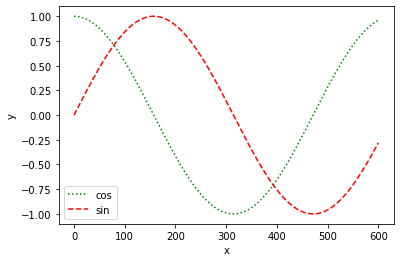

In [ ]:
pyplot.plot(torch.cos(x), "g:", label="cos")
pyplot.plot(torch.sin(x), "r--", label="sin")
pyplot.legend()
pyplot.xlabel("x")
pyplot.ylabel("y")

### Plotting Points
Points can be plotted in various ways. 
For example, you can select a different marker instead of a line:

Text(0, 0.5, 'y')

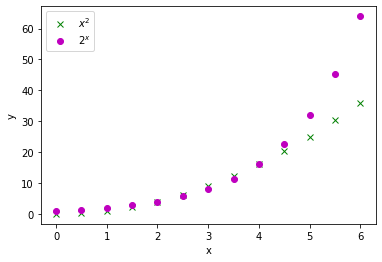

In [ ]:
x = torch.arange(0, 6.01, 0.5)
pyplot.plot(x, x**2, "gx", label="$x^2$")
pyplot.plot(x, 2**x, "mo", label="$2^x$")
pyplot.legend()
pyplot.xlabel("x")
pyplot.ylabel("y")

Note that the points do not need to be related in any way:

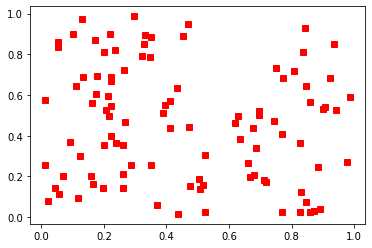

In [ ]:
points = torch.rand(size=(100,2))
pyplot.plot(points[:,0], points[:,1], "rs")

## Task 4 (7 minutes)
Create equidistant and sorted input values $-4\leq x \leq4$.
Compute the function $y = f(x)=2 x^2 + \cos(x)$.
Plot the function $(x,y)$ as a green line plot and label `line`.

Add noise to your output $t = y + \mathcal N(0,3)$
Plot the points $(x,t)$ as separate points with start shape and red color and label `points`.

In [24]:
x = torch.arange(-4,4.01,0.1)

In [29]:
y = 2*x**2 + torch.cos(x)

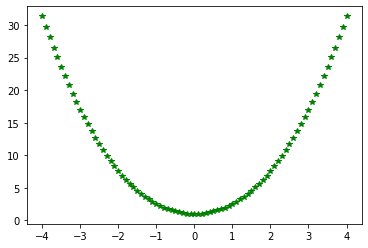

In [37]:
pyplot.plot(x,y,"g*", label="line")

In [34]:
t = y + torch.normal(0,3,x.shape)

In [41]:
torch.arange(-4,5.1,0.1)

tensor([-4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000, -3.4000, -3.3000,
        -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000,
        -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000,
        -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000, -1.0000, -0.9000,
        -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000, -0.2000, -0.1000,
         0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,
         4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,
         4.8000,  4.9000,  5.0000])

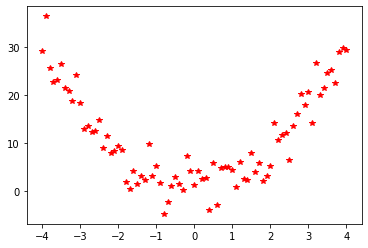

In [35]:
pyplot.plot(x,t,"r*", label="points")

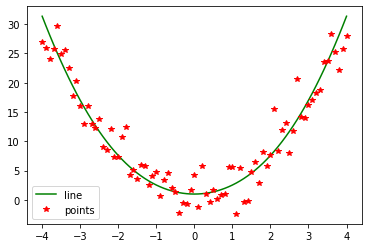

In [ ]:
# create input values x
x = torch.arange(-4,4.01,0.1)
# compute function y
y = 2*x**2 + torch.cos(x)
# plot function
pyplot.plot(x,y,"g-", label="line")

# add noise to y
t = y + torch.normal(0,3,size=x.shape)
# plot the points
pyplot.plot(x,t,"r*", label="points")

# anything else?
pyplot.legend()

In [42]:
x.shape

torch.Size([81])

In [49]:
torch.normal(0,3,size=x.shape)

tensor([-2.2139,  3.5294, -0.8874, -5.6832, -1.4801, -1.3974, -2.4857, -1.2699,
        -0.5501,  4.9809, -4.8852,  1.6656, -0.9810, -1.4949,  1.0011, -3.7334,
        -0.7594, -1.0183, -1.9462, -0.2748, -0.5603, -5.9098, -1.0039,  2.7045,
        -0.4579,  0.9013,  2.9399,  0.4836,  0.6752,  0.8697,  0.6972, -0.2629,
        -2.7206,  0.6512, -6.1453,  4.9357,  3.5237, -3.8797, -1.3738, -0.2721,
        -4.0337, -1.1112,  5.5473,  4.5185,  3.4516,  4.6797, -1.5200, -2.7239,
        -0.6636,  3.6285, -3.3177, -5.6164, -0.6915, -1.0135,  0.2548,  0.1713,
         2.2560, -1.2035, -1.1510,  0.5205, -2.2073, -0.7809,  1.4455,  0.8971,
         2.6546, -1.6406,  1.1529,  4.9779,  0.1527, -0.4933, -0.6505, -6.2210,
         2.4983,  0.3453, -2.1904,  0.4053, -0.4715, -0.4500,  3.7034, -5.0177,
         4.0982])